In [1]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt

from config import config

In [2]:
perf_path_prefix = config["perf_path_prefix"]

memused_ary = []
for jobid in os.listdir(perf_path_prefix):
    for fn in os.listdir(perf_path_prefix+"/"+jobid):
        fullname = perf_path_prefix+"/"+jobid+"/"+fn

        with open(fullname, "r") as f:
            jobperf = yaml.safe_load(f)

            perflist = jobperf["metrics"]

            # find the largest memory used
            maxmem = 0
            for i in range(len(perflist)):
                memused = float(perflist[i].split(":")[6])
                if memused > maxmem:
                    maxmem = memused

        memused_ary.append(maxmem/1024)

#print(memused_ary)

In [27]:
x = np.array(memused_ary)
y = np.ceil(x).astype(int)

In [33]:
print(y)
y.size
y.max()

[41  7  2 ...  1 35  2]


80

In [45]:
# count values <5, <10, <20, <48, <80 GiB
counts1=np.bincount(y)
print(counts1[49:])
print(np.sum(counts1[49:]))
print(np.sum(counts1[11:21]))
print(np.sum(counts1[21:49]))
print(np.sum(counts1[1:11]))
np.append(np.sum(counts1[1:11]), np.sum(counts1[11:21]))
np.append(np.append(np.sum(counts1[1:11]), np.sum(counts1[11:21])), np.sum(counts1[21:49]))
np.append(np.append(np.append(np.sum(counts1[1:11]), np.sum(counts1[11:21])), np.sum(counts1[21:49])), np.sum(counts1[49:]))

[ 2  0  1  1  0  0  0  1  0  0  0  0  0  0  4  1  1  0  0  0  3  1  1  0
  0  1  1  0  1  0  5 19]
43
37
143
826


array([826,  37, 143,  43])

In [46]:
bins1 = ["10", "20", "48", "80"]
bincounts1 = np.append(np.append(np.append(np.sum(counts1[1:11]), np.sum(counts1[11:21])), np.sum(counts1[21:49])), np.sum(counts1[49:]))
bincounts1

array([826,  37, 143,  43])

<BarContainer object of 4 artists>

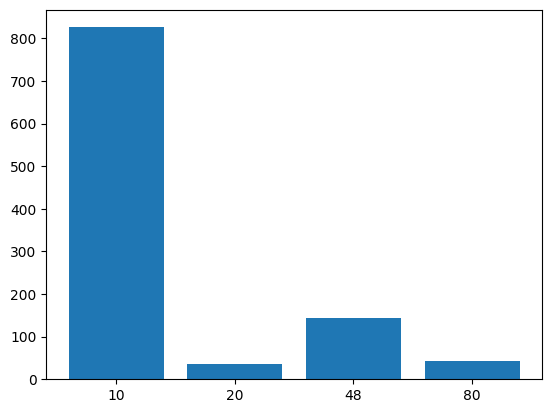

In [53]:
fig, ax = plt.subplots()
ax.bar(bins1, bincounts1)

In [51]:
z = np.ceil(x).astype(int)
# count values <6, <12, <24, <48, <80 GiB
counts2=np.bincount(z)
counts2
bins2 = ["6", "12", "24", "48", "80"]
bincounts2 = np.append(np.append(np.append(np.append(np.sum(counts2[1:7]), np.sum(counts2[7:13])), np.sum(counts2[13:25])), np.sum(counts2[25:49])), np.sum(counts2[49:]))
bincounts2

array([489, 344,  71, 102,  43])

<BarContainer object of 5 artists>

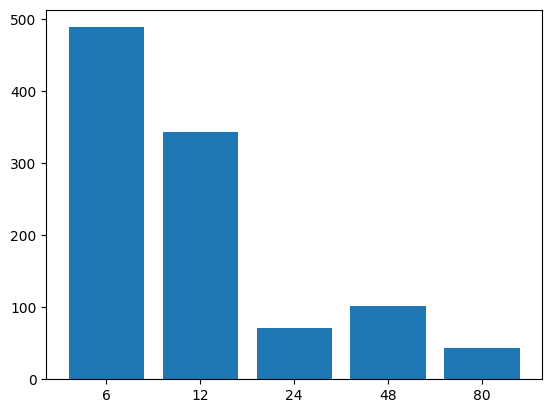

In [52]:
fig, ax = plt.subplots()
ax.bar(bins2, bincounts2)